# Zomato is a food delivery company.To be best in this business,They put a lot of efforts in delivering food on time.For this,They have to inform user about expected time for delivery.So here,Find the attachment file.Build a model which can predict expected delivery time.

**Importing Libararies**

In [758]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import statsmodels.api as smd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
%matplotlib inline

**Reading the csv file**

In [759]:
df = pd.read_csv('finalTrain.csv')
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [760]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [761]:
df.shape

(45584, 20)

In [762]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


**Finding the total number of null values in dataset**

In [763]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [764]:
df['City'].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban', nan], dtype=object)

In [765]:
df['Festival'].unique()

array(['No', 'Yes', nan], dtype=object)

In [766]:
df['multiple_deliveries'].unique()

array([ 3.,  1.,  0., nan,  2.])

In [767]:
df['Weather_conditions'].unique()

array(['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny', nan],
      dtype=object)

In [768]:
df['Vehicle_condition'].unique()

array([2, 1, 0, 3])

In [769]:
df['Type_of_vehicle'].unique()

array(['motorcycle', 'scooter', 'electric_scooter', 'bicycle'],
      dtype=object)

In [770]:
df['Time_Orderd'].head(40)

0           21:55
1           14:55
2           17:30
3           09:20
4           19:50
5           20:25
6           14:55
7           20:30
8           20:40
9           21:15
10          20:20
11          22:30
12          08:15
13          19:30
14          12:25
15          18:35
16          20:35
17          23:20
18          21:20
19          23:35
20          22:35
21          22:35
22          23:25
23          13:35
24          21:35
25          22:35
26          18:55
27          14:15
28    0.458333333
29          09:45
30          08:40
31    0.958333333
32          17:25
33            NaN
34          19:45
35          19:10
36          10:55
37          21:40
38    0.791666667
39          16:45
Name: Time_Orderd, dtype: object

**As we can see that there are float values as well as string values of time so now converting the given string and float values of time orederd and Time_Order_picked to int format into minutes**

In [771]:
df['Time_Orderd'] = df['Time_Orderd'].str.split(':')

In [772]:
df['Time_Orderd'].isnull().sum()

1731

In [773]:
df['Time_Orderd'].head(40)

0          [21, 55]
1          [14, 55]
2          [17, 30]
3          [09, 20]
4          [19, 50]
5          [20, 25]
6          [14, 55]
7          [20, 30]
8          [20, 40]
9          [21, 15]
10         [20, 20]
11         [22, 30]
12         [08, 15]
13         [19, 30]
14         [12, 25]
15         [18, 35]
16         [20, 35]
17         [23, 20]
18         [21, 20]
19         [23, 35]
20         [22, 35]
21         [22, 35]
22         [23, 25]
23         [13, 35]
24         [21, 35]
25         [22, 35]
26         [18, 55]
27         [14, 15]
28    [0.458333333]
29         [09, 45]
30         [08, 40]
31    [0.958333333]
32         [17, 25]
33              NaN
34         [19, 45]
35         [19, 10]
36         [10, 55]
37         [21, 40]
38    [0.791666667]
39         [16, 45]
Name: Time_Orderd, dtype: object

In [774]:
df['Time_Orderd'] = df['Time_Orderd'].apply(lambda x: int(float(x[0])*60 + int(x[1])) if isinstance(x, list) and len(x) == 2 else None)

In [775]:
df['Time_Orderd'].head(40)

0     1315.0
1      895.0
2     1050.0
3      560.0
4     1190.0
5     1225.0
6      895.0
7     1230.0
8     1240.0
9     1275.0
10    1220.0
11    1350.0
12     495.0
13    1170.0
14     745.0
15    1115.0
16    1235.0
17    1400.0
18    1280.0
19    1415.0
20    1355.0
21    1355.0
22    1405.0
23     815.0
24    1295.0
25    1355.0
26    1135.0
27     855.0
28       NaN
29     585.0
30     520.0
31       NaN
32    1045.0
33       NaN
34    1185.0
35    1150.0
36     655.0
37    1300.0
38       NaN
39    1005.0
Name: Time_Orderd, dtype: float64

In [776]:
mean = df['Time_Orderd'].mean()

In [777]:
df['Time_Orderd'] = df['Time_Orderd'].fillna(mean)

In [778]:
df['Time_Orderd'] = df['Time_Orderd'].astype(int)

In [779]:
df['Time_Orderd'].isnull().sum()

0

In [780]:
df['Time_Order_picked'] = df['Time_Order_picked'].str.split(':').apply(lambda x: int(float(x[0])*60 + int(x[1])) if isinstance(x, list) and len(x) == 2 else None)

In [781]:
mean1 = df['Time_Order_picked'].mean()

In [782]:
df['Time_Order_picked'] = df['Time_Order_picked'].fillna(mean1)

In [783]:
df['Time_Order_picked'] = df['Time_Order_picked'].astype(int)

In [784]:
df['Time_Orderd'].isnull().sum()

0

In [785]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                       0
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

**Dropping all the unnecesary columns**

In [786]:
num_var = ['ID','Delivery_person_ID','Delivery_person_Age','Delivery_person_Ratings','Order_Date']

df = df.drop(num_var, axis=1)

In [787]:
df.isnull().sum()

Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                       0
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

**Getting the distance of the delivery**

In [788]:
df['Restaurant_latitude']

0        30.327968
1        10.003064
2        18.562450
3        30.899584
4        26.463504
           ...    
45579    26.902328
45580     0.000000
45581    13.022394
45582    11.001753
45583    23.351058
Name: Restaurant_latitude, Length: 45584, dtype: float64

In [789]:
df['Restaurant_longitude']

0        78.046106
1        76.307589
2        73.916619
3        75.809346
4        80.372929
           ...    
45579    75.794257
45580     0.000000
45581    80.242439
45582    76.986241
45583    85.325731
Name: Restaurant_longitude, Length: 45584, dtype: float64

In [790]:
df['Delivery_location_latitude']

0        30.397968
1        10.043064
2        18.652450
3        30.919584
4        26.593504
           ...    
45579    26.912328
45580     0.070000
45581    13.052394
45582    11.041753
45583    23.431058
Name: Delivery_location_latitude, Length: 45584, dtype: float64

In [791]:
df['Delivery_location_longitude']

0        78.116106
1        76.347589
2        74.006619
3        75.829346
4        80.502929
           ...    
45579    75.804257
45580     0.070000
45581    80.272439
45582    77.026241
45583    85.405731
Name: Delivery_location_longitude, Length: 45584, dtype: float64

In [792]:
import math

def distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the earth in km
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    a = math.sin(dLat / 2) * math.sin(dLat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dLon / 2) * math.sin(dLon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance_km = R * c  # Distance in km
    return distance_km

In [793]:
df['rest_distance'] = df.apply(lambda row: distance(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

df['delivery_distance'] = df.apply(lambda row: distance(row['Delivery_location_latitude'], row['Delivery_location_longitude'],row['Restaurant_latitude'], row['Restaurant_longitude'], ), axis=1)

In [794]:
df['rest_distance'] = df['rest_distance'].astype(int)

In [795]:
df['delivery_distance'] = df['delivery_distance'].astype(int)

**Function for checking the delivery distance and rest distance**

In [796]:
# function for checking the delivery distance and rest distance
def rest_and_delivery_distance():
  if df['delivery_distance'].equals(df['rest_distance']):
    print('They Are Equal')
  else:
    print('They Are Not Equal')
rest_and_delivery_distance()

They Are Equal


**Dropping the uncessary columns**

In [797]:
num_var1 = ['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']
df = df.drop(num_var1, axis=1)

In [798]:
df.head()

,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),rest_distance,delivery_distance
0,1315,1330,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10,10
1,895,905,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6,6
2,1050,1060,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13,13
3,560,570,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2,2
4,1190,1205,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19,19


**Delivery time taken for delivering food from time of oreder to time of delivery**

In [799]:
df['estimate time'] = (df['Time_Order_picked'] - df['Time_Orderd']) + df['Time_taken (min)']

In [800]:
df.head()

,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),rest_distance,delivery_distance,estimate time
0,1315,1330,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10,10,61
1,895,905,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6,6,33
2,1050,1060,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13,13,31
3,560,570,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2,2,30
4,1190,1205,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19,19,56


**Define afunction to convert minutes to 'HH:MM' format**

In [801]:
# define afunction to convert minutes to 'HH:MM' format

def minutes_to_hours_minutes(minutes):
    hours, minutes = divmod(int(minutes), 60)
    return f'{hours:02d}:{minutes:02d}'

In [802]:
avg_delivery_time = df['estimate time'].mean()
avg_delivery_time

29.355497542997544

In [803]:
# convert the average delivery time to 'HH:MM' format
avg_delivery_time_formatted = minutes_to_hours_minutes(avg_delivery_time)
avg_delivery_time_formatted

'00:29'

In [804]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')
Numerical Variables:
['Time_Orderd', 'Time_Order_picked', 'Vehicle_condition', 'multiple_deliveries', 'Time_taken (min)', 'rest_distance', 'delivery_distance', 'estimate time']


Time_Orderd
Skew : -0.86


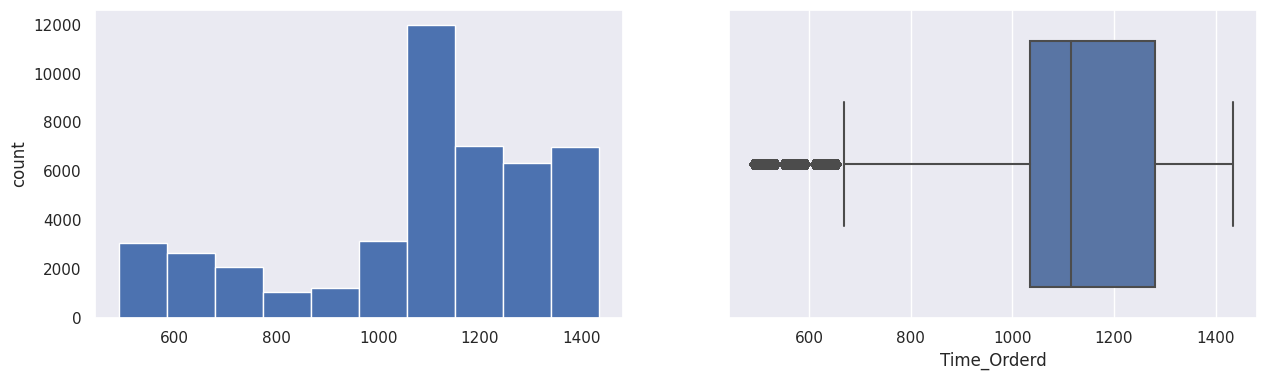

Time_Order_picked
Skew : -0.84


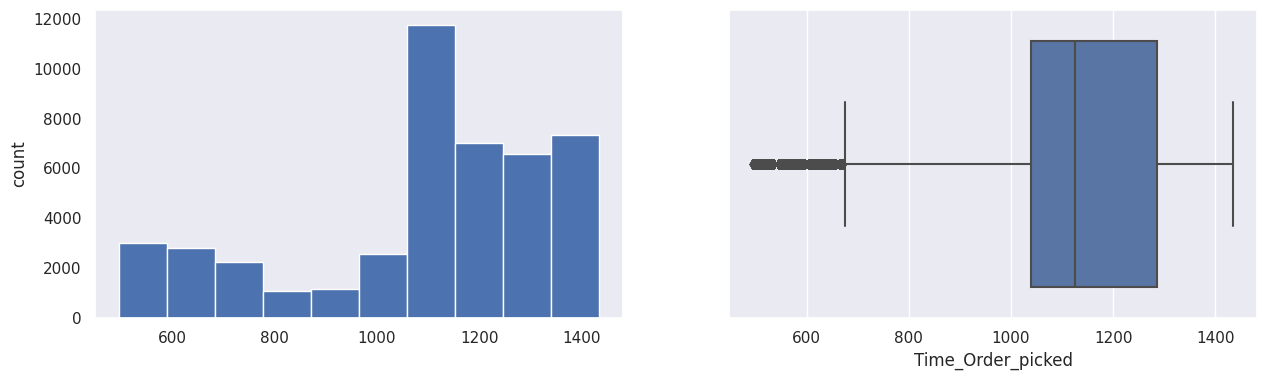

Vehicle_condition
Skew : 0.07


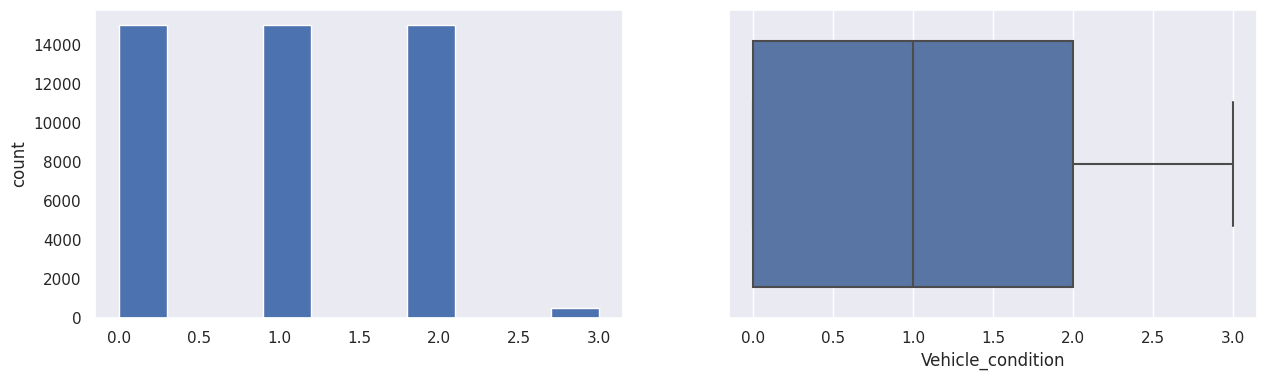

multiple_deliveries
Skew : 0.32


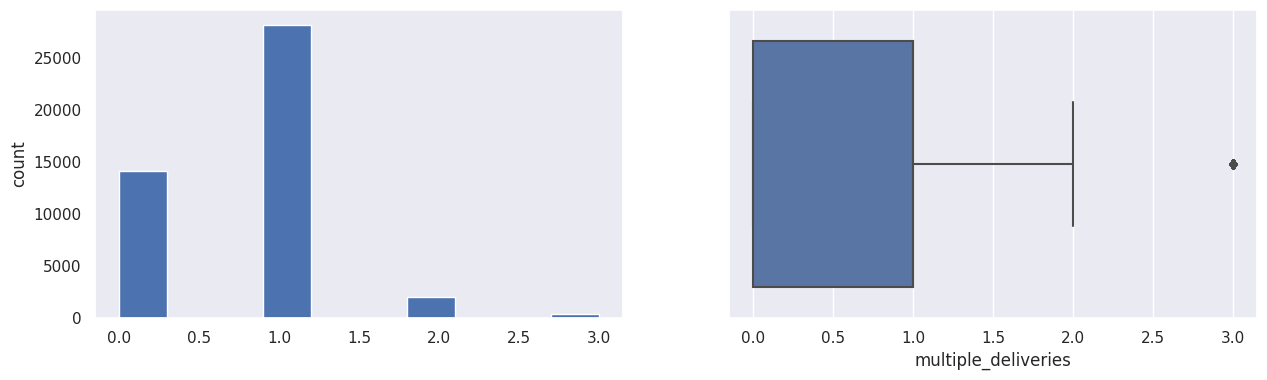

Time_taken (min)
Skew : 0.49


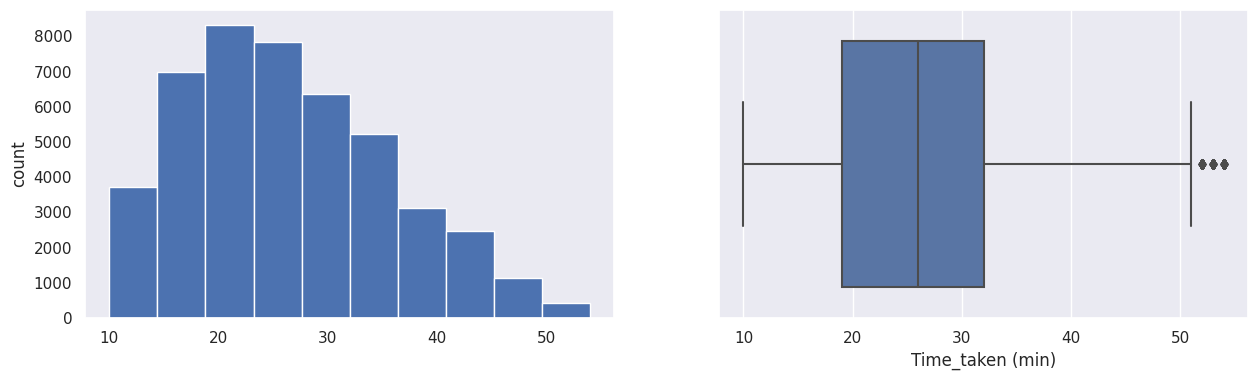

rest_distance
Skew : 14.46


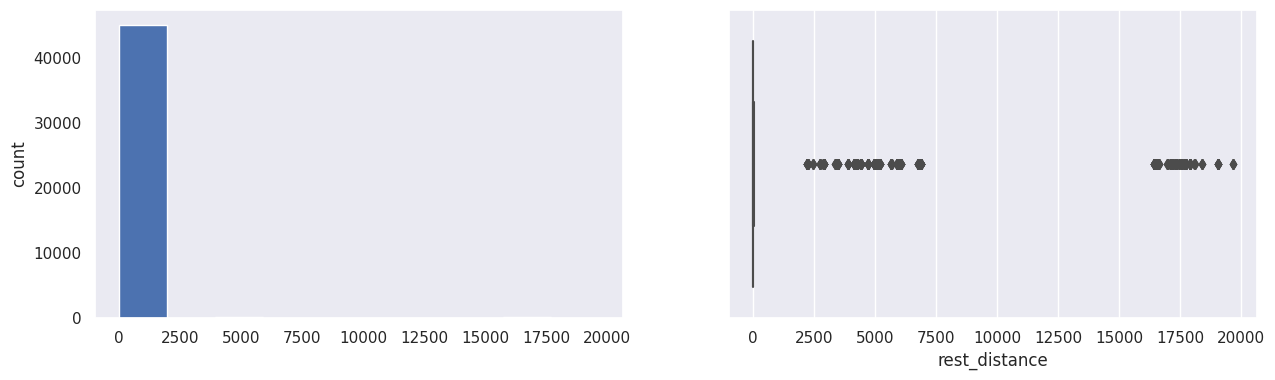

delivery_distance
Skew : 14.46


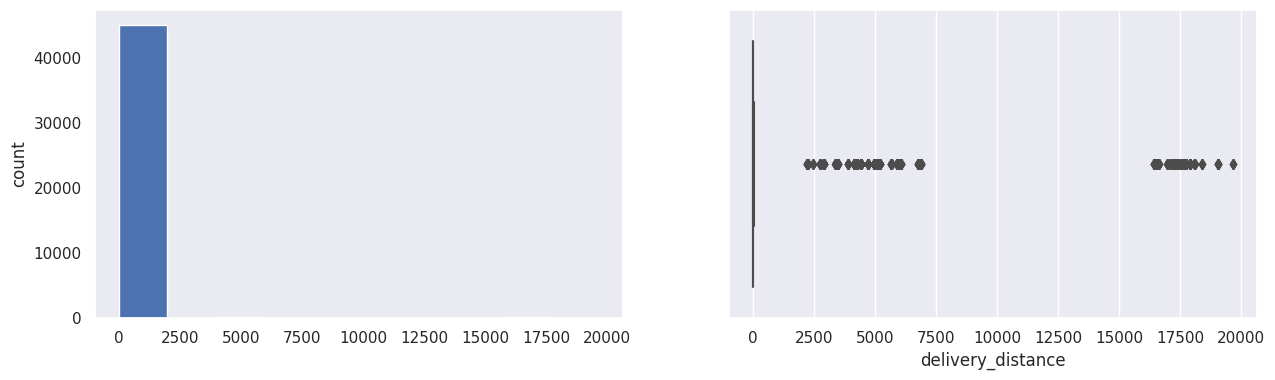

estimate time
Skew : -0.64


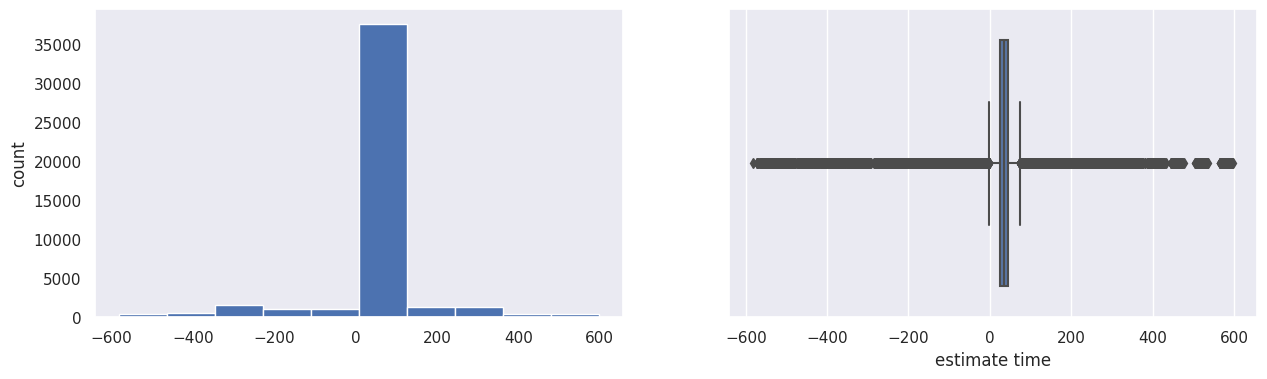

In [805]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

"'Weather_conditions', 'Road_traffic_density', 'Type_of_order',\n       'Type_of_vehicle', 'Festival', 'City'"

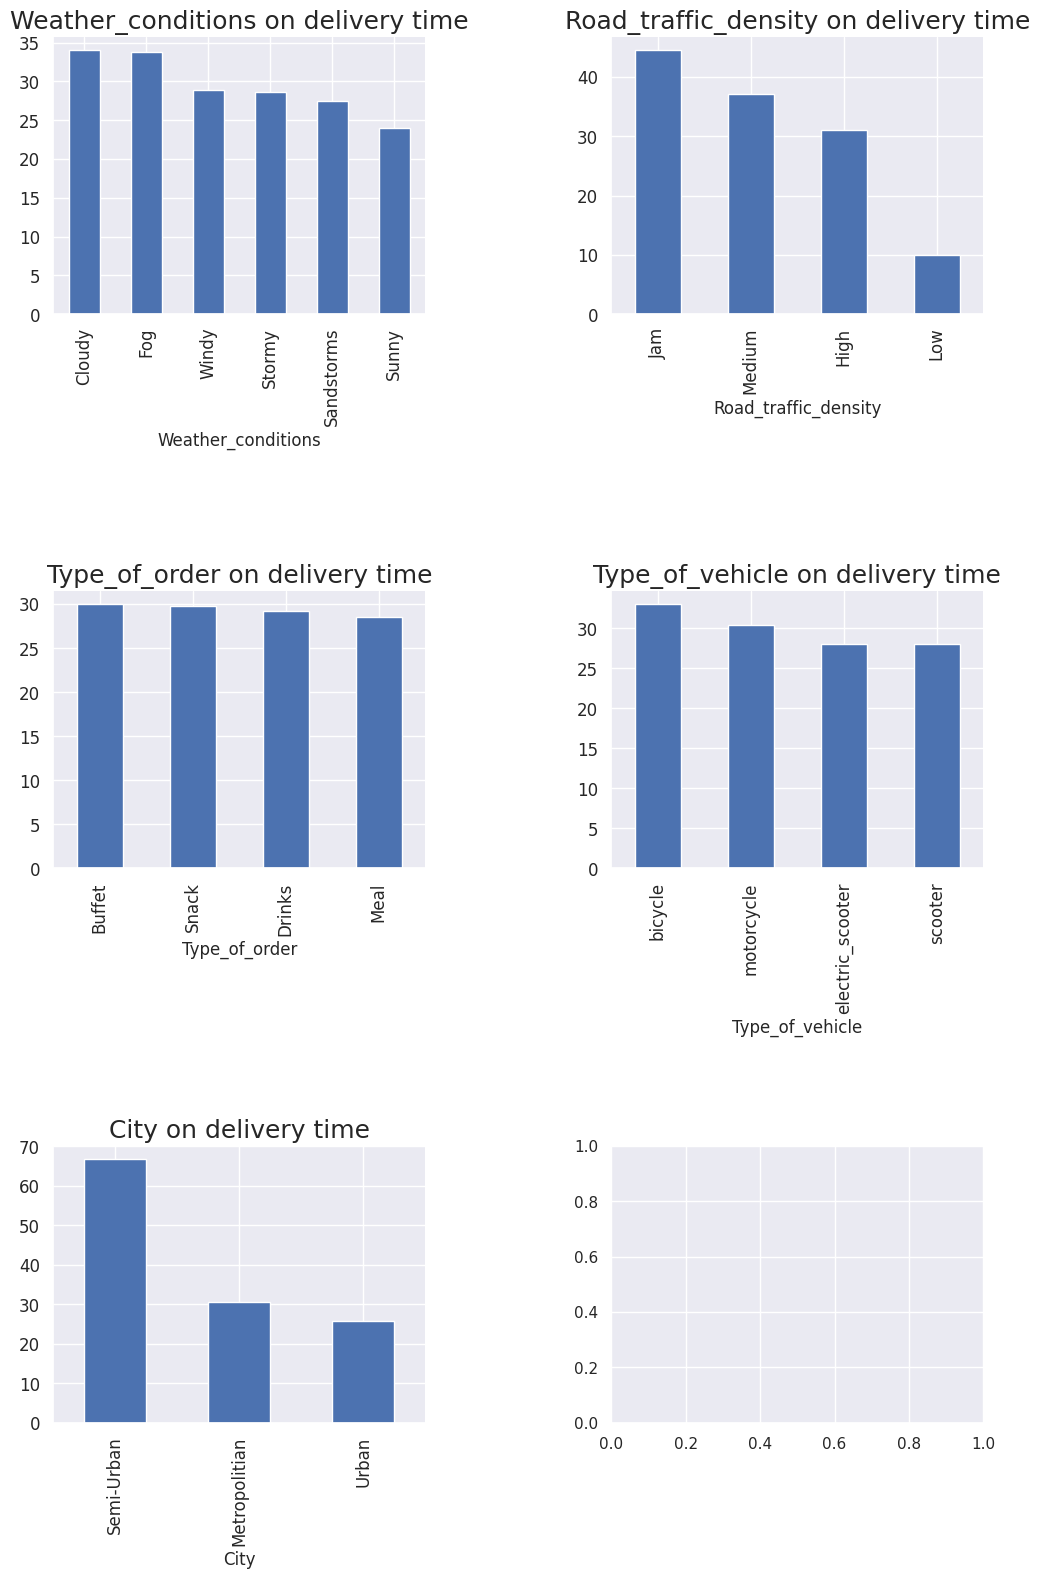

In [806]:
fig, axarr = plt.subplots(3, 2, figsize=(12, 18))
df.groupby('Weather_conditions')['estimate time'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Weather_conditions on delivery time", fontsize=18)
df.groupby('Road_traffic_density')['estimate time'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Road_traffic_density on delivery time", fontsize=18)
df.groupby('Type_of_order')['estimate time'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Type_of_order on delivery time", fontsize=18)
df.groupby('Type_of_vehicle')['estimate time'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Type_of_vehicle on delivery time", fontsize=18)
df.groupby('City')['estimate time'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("City on delivery time", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()
"""'Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'"""

In [807]:
df.isnull().sum()

Time_Orderd                0
Time_Order_picked          0
Weather_conditions       616
Road_traffic_density     601
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries      993
Festival                 228
City                    1200
Time_taken (min)           0
rest_distance              0
delivery_distance          0
estimate time              0
dtype: int64

In [808]:
df = df.dropna()
df.isnull().sum()

Time_Orderd             0
Time_Order_picked       0
Weather_conditions      0
Road_traffic_density    0
Vehicle_condition       0
Type_of_order           0
Type_of_vehicle         0
multiple_deliveries     0
Festival                0
City                    0
Time_taken (min)        0
rest_distance           0
delivery_distance       0
estimate time           0
dtype: int64

In [809]:
df.shape

(42646, 14)

In [810]:
df['Weather_conditions'].unique()

array(['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny'],
      dtype=object)

In [811]:
df['City'].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban'], dtype=object)

In [812]:
df['Vehicle_condition'].unique()

array([2, 1, 0])

In [813]:
df['Road_traffic_density'].unique()

array(['Jam', 'High', 'Medium', 'Low'], dtype=object)

In [814]:
df['Type_of_order'].unique()

array(['Snack', 'Meal', 'Drinks', 'Buffet'], dtype=object)

In [815]:
df['Type_of_vehicle'].unique()

array(['motorcycle', 'scooter', 'electric_scooter'], dtype=object)

In [816]:
df['multiple_deliveries'].unique()

array([3., 1., 0., 2.])

In [817]:
df['Festival'].unique()

array(['No', 'Yes'], dtype=object)

In [818]:
df['Festival'] = df['Festival'].map({'Yes': 1, 'No': 0})
df.head()

,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),rest_distance,delivery_distance,estimate time
0,1315,1330,Fog,Jam,2,Snack,motorcycle,3.0,0,Metropolitian,46,10,10,61
1,895,905,Stormy,High,1,Meal,motorcycle,1.0,0,Metropolitian,23,6,6,33
2,1050,1060,Sandstorms,Medium,1,Drinks,scooter,1.0,0,Metropolitian,21,13,13,31
3,560,570,Sandstorms,Low,0,Buffet,motorcycle,0.0,0,Metropolitian,20,2,2,30
4,1190,1205,Fog,Jam,1,Snack,scooter,1.0,0,Metropolitian,41,19,19,56


# Finding the correlation between the variables

In [819]:
# Check the corr values of final list of variables
cor = df.corr()
cor 

,Time_Orderd,Time_Order_picked,Vehicle_condition,multiple_deliveries,Festival,Time_taken (min),rest_distance,delivery_distance,estimate time
Time_Orderd,1.000000,0.884906,0.004461,0.061522,0.049341,0.165976,0.006462,0.006462,-0.232913
Time_Order_picked,0.884906,1.000000,0.006705,0.068192,0.053200,0.182114,0.005182,0.005182,0.245504
Vehicle_condition,0.004461,0.006705,1.000000,-0.101129,-0.084424,-0.242309,0.003233,0.003233,-0.013870
multiple_deliveries,0.061522,0.068192,-0.101129,1.000000,0.141601,0.383707,0.002605,0.002605,0.042612
Festival,0.049341,0.053200,-0.084424,0.141601,1.000000,0.290859,0.006502,0.006502,0.029804
Time_taken (min),0.165976,0.182114,-0.242309,0.383707,0.290859,1.000000,-0.005262,-0.005262,0.108439
rest_distance,0.006462,0.005182,0.003233,0.002605,0.006502,-0.005262,1.000000,1.000000,-0.003099
delivery_distance,0.006462,0.005182,0.003233,0.002605,0.006502,-0.005262,1.000000,1.000000,-0.003099
estimate time,-0.232913,0.245504,-0.013870,0.042612,0.029804,0.108439,-0.003099,-0.003099,1.000000


In [820]:
# Find out the Fields with high correlation

correlated_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.8:
            colname1 = cor.columns[i]
            colname2 = cor.columns[j]
            print(abs(cor.iloc[i, j]), "--", i, '--', j, '--', colname1, '--', colname2)
            correlated_features.add(colname1)
            correlated_features.add(colname2)

0.8849063008937474 -- 1 -- 0 -- Time_Order_picked -- Time_Orderd
1.0 -- 7 -- 6 -- delivery_distance -- rest_distance


In [821]:
print(cor.columns)
print('------')
print(correlated_features)

Index(['Time_Orderd', 'Time_Order_picked', 'Vehicle_condition',
       'multiple_deliveries', 'Festival', 'Time_taken (min)', 'rest_distance',
       'delivery_distance', 'estimate time'],
      dtype='object')
------
{'Time_Orderd', 'Time_Order_picked', 'rest_distance', 'delivery_distance'}


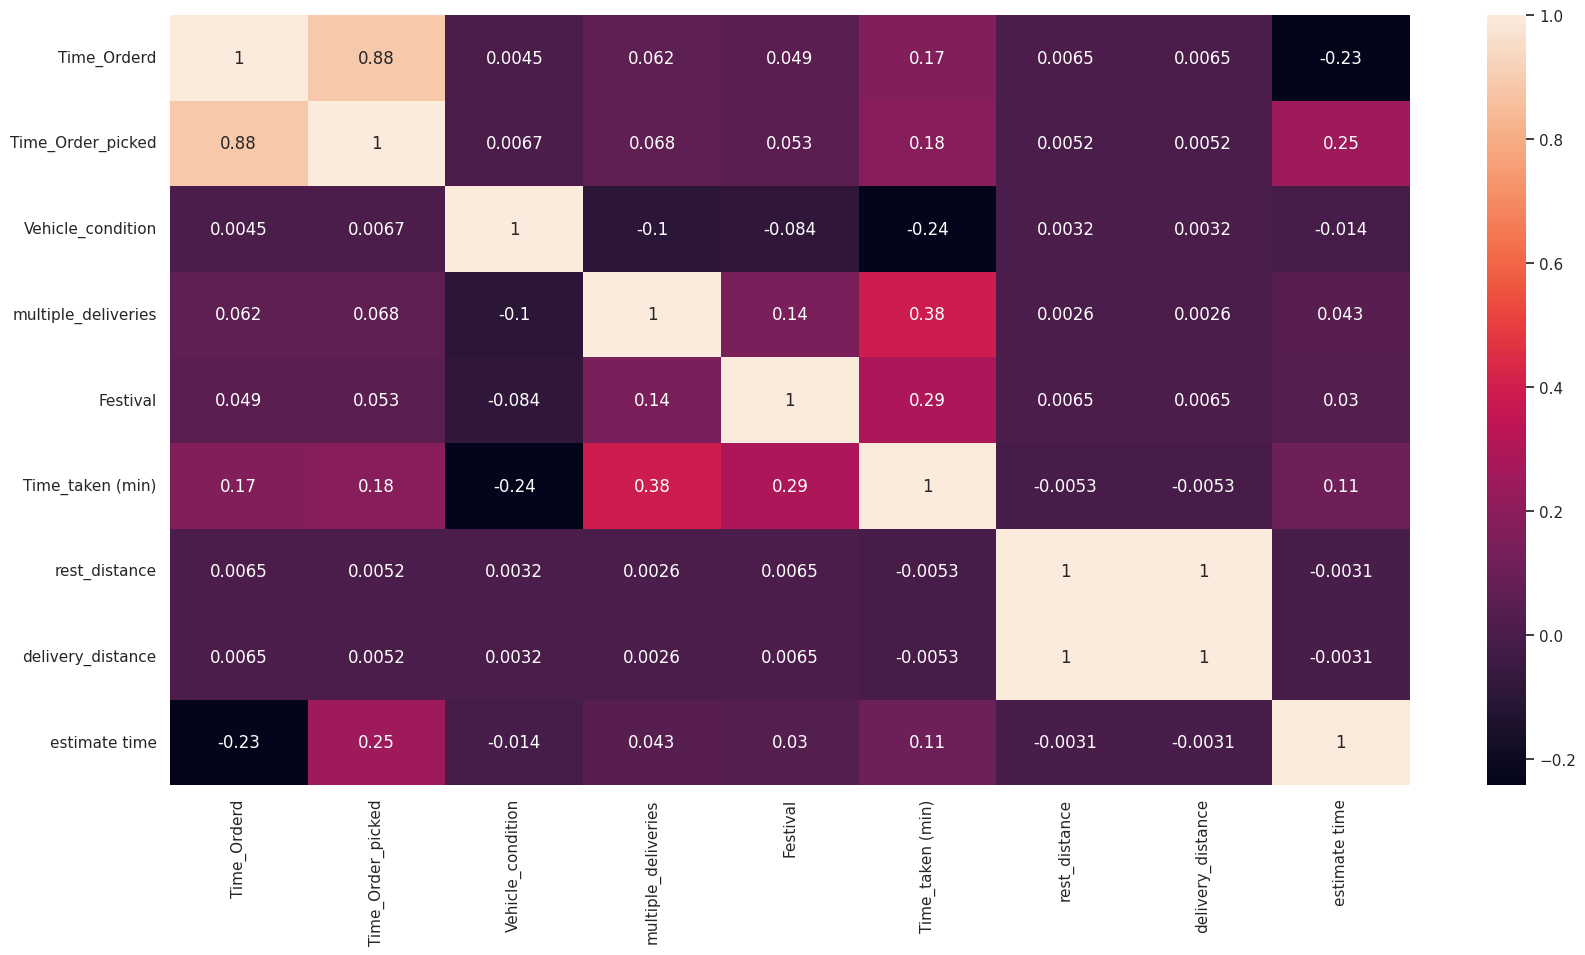

In [822]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [823]:
# Print the Correlation values of the High Correlated fields

corh = df[correlated_features].corr()
corh

,Time_Orderd,Time_Order_picked,rest_distance,delivery_distance
Time_Orderd,1.000000,0.884906,0.006462,0.006462
Time_Order_picked,0.884906,1.000000,0.005182,0.005182
rest_distance,0.006462,0.005182,1.000000,1.000000
delivery_distance,0.006462,0.005182,1.000000,1.000000


<Axes: >

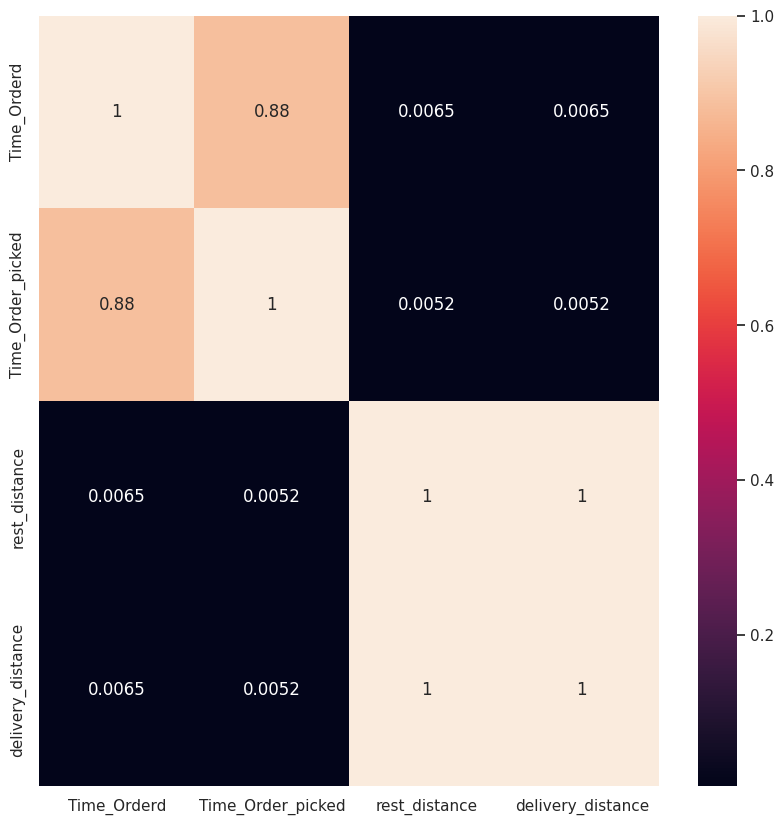

In [824]:
# Produce a Heatmap

plt.figure(figsize=(10,10)) 
sns.heatmap(corh, annot=True)

**Getting the dummy variables**

In [825]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [826]:
df1 = df
df1 = dummies('Weather_conditions',df1)
df1 = dummies('City',df1)
df1 = dummies('Road_traffic_density',df1)
df1 = dummies('Type_of_order',df1)
df1 = dummies('Type_of_vehicle',df1)

In [827]:
df1.head()

,Time_Orderd,Time_Order_picked,Vehicle_condition,multiple_deliveries,Festival,Time_taken (min),rest_distance,delivery_distance,estimate time,Fog,...,Semi-Urban,Urban,Jam,Low,Medium,Drinks,Meal,Snack,motorcycle,scooter
0,1315,1330,2,3.0,0,46,10,10,61,1,...,0,0,1,0,0,0,0,1,1,0
1,895,905,1,1.0,0,23,6,6,33,0,...,0,0,0,0,0,0,1,0,1,0
2,1050,1060,1,1.0,0,21,13,13,31,0,...,0,0,0,0,1,1,0,0,0,1
3,560,570,0,0.0,0,20,2,2,30,0,...,0,0,0,1,0,0,0,0,1,0
4,1190,1205,1,1.0,0,41,19,19,56,1,...,0,0,1,0,0,0,0,1,0,1


In [828]:
df1.shape

(42646, 24)

In [829]:
df1.isnull().sum()

Time_Orderd            0
Time_Order_picked      0
Vehicle_condition      0
multiple_deliveries    0
Festival               0
Time_taken (min)       0
rest_distance          0
delivery_distance      0
estimate time          0
Fog                    0
Sandstorms             0
Stormy                 0
Sunny                  0
Windy                  0
Semi-Urban             0
Urban                  0
Jam                    0
Low                    0
Medium                 0
Drinks                 0
Meal                   0
Snack                  0
motorcycle             0
scooter                0
dtype: int64

In [830]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42646 entries, 0 to 45583
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time_Orderd          42646 non-null  int64  
 1   Time_Order_picked    42646 non-null  int64  
 2   Vehicle_condition    42646 non-null  int64  
 3   multiple_deliveries  42646 non-null  float64
 4   Festival             42646 non-null  int64  
 5   Time_taken (min)     42646 non-null  int64  
 6   rest_distance        42646 non-null  int64  
 7   delivery_distance    42646 non-null  int64  
 8   estimate time        42646 non-null  int64  
 9   Fog                  42646 non-null  uint8  
 10  Sandstorms           42646 non-null  uint8  
 11  Stormy               42646 non-null  uint8  
 12  Sunny                42646 non-null  uint8  
 13  Windy                42646 non-null  uint8  
 14  Semi-Urban           42646 non-null  uint8  
 15  Urban                42646 non-null 

# Standardizing our data


In [831]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_vars3 = ['Time_Orderd', 'Time_Order_picked', 'Time_taken (min)','multiple_deliveries', 'Vehicle_condition', 'rest_distance', 'delivery_distance','estimate time']
scaled_data = scaler.fit_transform(df1[num_vars3].values)
df_scaled = pd.DataFrame(scaled_data, columns = num_vars3)

In [832]:
df_scaled.head()

,Time_Orderd,Time_Order_picked,Time_taken (min),multiple_deliveries,Vehicle_condition,rest_distance,delivery_distance,estimate time
0,0.893669,0.942953,2.080715,3.932797,1.227793,-0.063904,-0.063904,0.254069
1,-0.756897,-0.733240,-0.380366,0.438452,0.004846,-0.069865,-0.069865,0.025549
2,-0.147760,-0.121922,-0.594373,0.438452,0.004846,-0.059433,-0.059433,0.009227
3,-2.073421,-2.054474,-0.701377,-1.308720,-1.218100,-0.075827,-0.075827,0.001065
4,0.402429,0.449955,1.545697,0.438452,0.004846,-0.050491,-0.050491,0.213262


In [833]:
# Replace the scaled columns with the corresponding columns in the df_scaled dataframe
df1[num_vars3] = df_scaled[num_vars3]

In [834]:
df1.head()

,Time_Orderd,Time_Order_picked,Vehicle_condition,multiple_deliveries,Festival,Time_taken (min),rest_distance,delivery_distance,estimate time,Fog,...,Semi-Urban,Urban,Jam,Low,Medium,Drinks,Meal,Snack,motorcycle,scooter
0,0.893669,0.942953,1.227793,3.932797,0,2.080715,-0.063904,-0.063904,0.254069,1,...,0,0,1,0,0,0,0,1,1,0
1,-0.756897,-0.733240,0.004846,0.438452,0,-0.380366,-0.069865,-0.069865,0.025549,0,...,0,0,0,0,0,0,1,0,1,0
2,-0.147760,-0.121922,0.004846,0.438452,0,-0.594373,-0.059433,-0.059433,0.009227,0,...,0,0,0,0,1,1,0,0,0,1
3,-2.073421,-2.054474,-1.218100,-1.308720,0,-0.701377,-0.075827,-0.075827,0.001065,0,...,0,0,0,1,0,0,0,0,1,0
4,0.402429,0.449955,0.004846,0.438452,0,1.545697,-0.050491,-0.050491,0.213262,1,...,0,0,1,0,0,0,0,1,0,1


In [835]:
df1.isnull().sum()

Time_Orderd            2750
Time_Order_picked      2750
Vehicle_condition      2750
multiple_deliveries    2750
Festival                  0
Time_taken (min)       2750
rest_distance          2750
delivery_distance      2750
estimate time          2750
Fog                       0
Sandstorms                0
Stormy                    0
Sunny                     0
Windy                     0
Semi-Urban                0
Urban                     0
Jam                       0
Low                       0
Medium                    0
Drinks                    0
Meal                      0
Snack                     0
motorcycle                0
scooter                   0
dtype: int64

In [836]:
df1 = df1.dropna()
df1

,Time_Orderd,Time_Order_picked,Vehicle_condition,multiple_deliveries,Festival,Time_taken (min),rest_distance,delivery_distance,estimate time,Fog,...,Semi-Urban,Urban,Jam,Low,Medium,Drinks,Meal,Snack,motorcycle,scooter
0,0.893669,0.942953,1.227793,3.932797,0,2.080715,-0.063904,-0.063904,0.254069,1,...,0,0,1,0,0,0,0,1,1,0
1,-0.756897,-0.733240,0.004846,0.438452,0,-0.380366,-0.069865,-0.069865,0.025549,0,...,0,0,0,0,0,0,1,0,1,0
2,-0.147760,-0.121922,0.004846,0.438452,0,-0.594373,-0.059433,-0.059433,0.009227,0,...,0,0,0,0,1,1,0,0,0,1
3,-2.073421,-2.054474,-1.218100,-1.308720,0,-0.701377,-0.075827,-0.075827,0.001065,0,...,0,0,0,1,0,0,0,0,1,0
4,0.402429,0.449955,0.004846,0.438452,0,1.545697,-0.050491,-0.050491,0.213262,1,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42640,0.854370,0.883794,1.227793,0.438452,0,0.689669,-0.054962,-0.054962,0.107164,0,...,0,0,0,0,1,0,0,1,1,0
42641,-1.542881,-1.522036,0.004846,-1.308720,0,0.582666,-0.077317,-0.077317,0.099002,0,...,0,0,1,0,0,0,0,1,0,1
42642,0.422079,0.469675,-1.218100,0.438452,0,1.010680,-0.062414,-0.062414,0.172455,1,...,0,0,0,0,1,0,0,1,1,0
42643,1.345610,-0.003603,0.004846,-1.308720,0,-1.129391,-0.072846,-0.072846,-2.888074,0,...,0,0,0,1,0,1,0,0,1,0


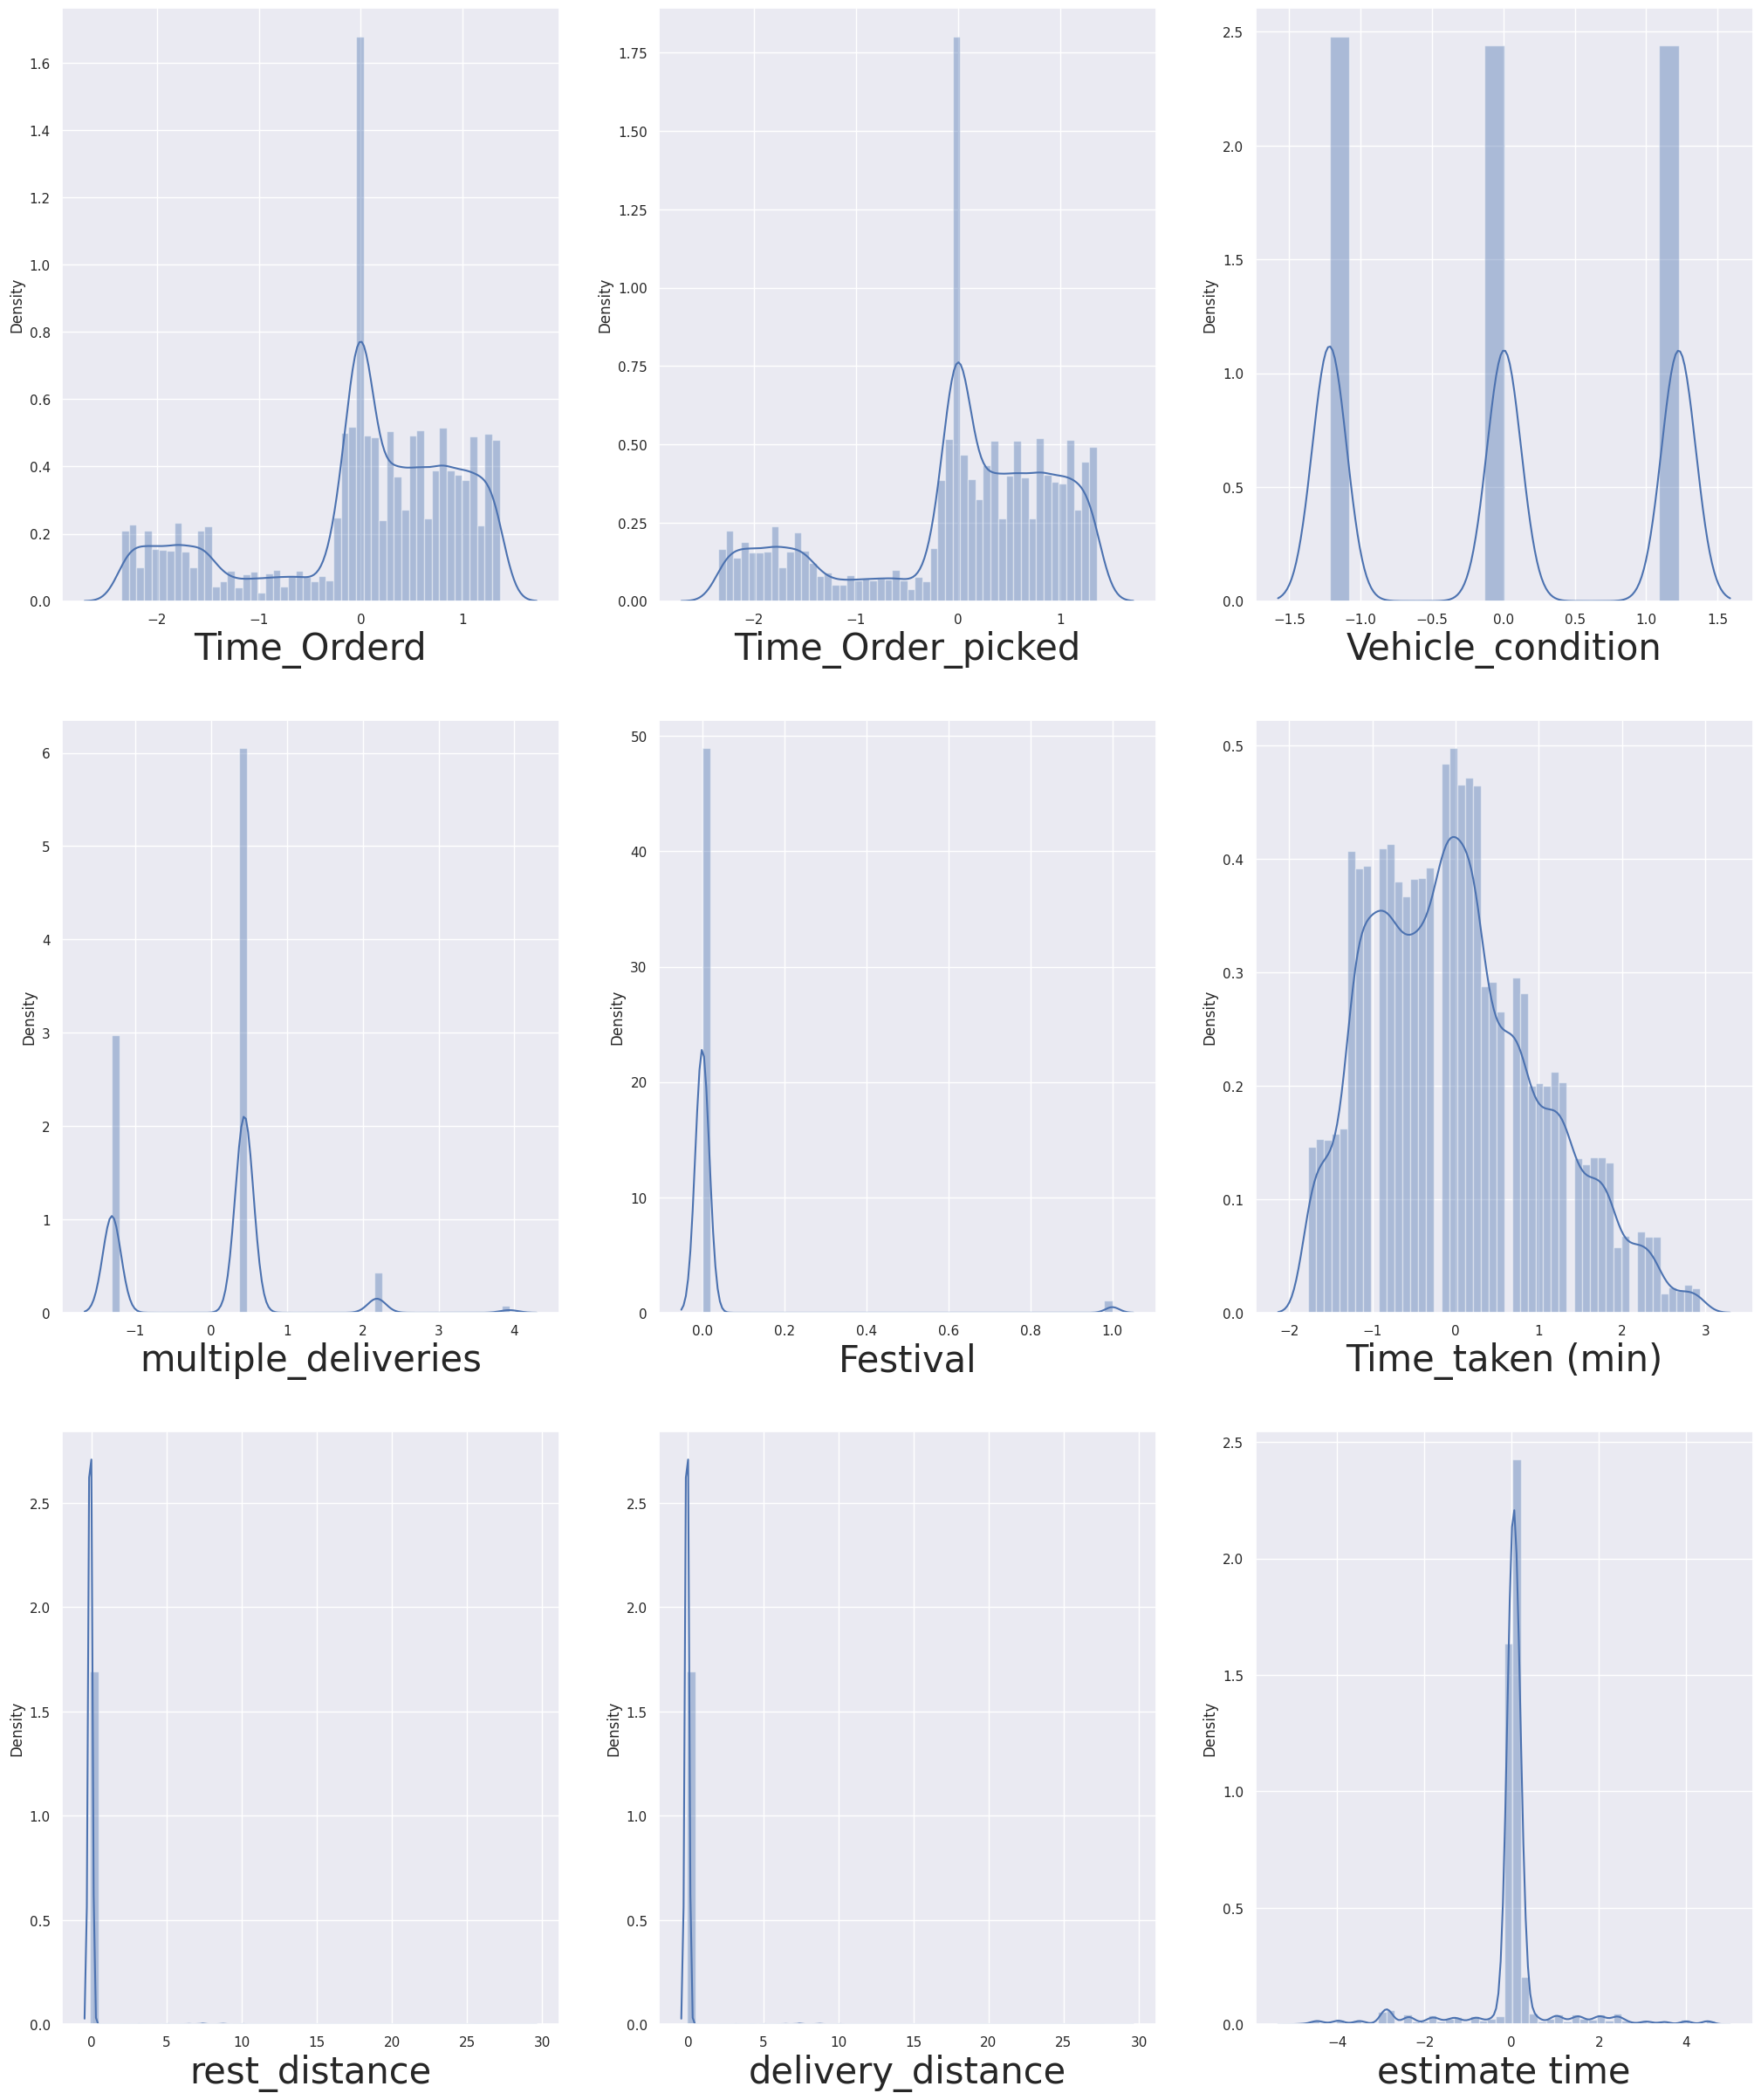

In [837]:
# Analysing the distribution of data.
plt.figure(figsize=(25,30),facecolor='white')
plotnumber = 1
sns.set()
for column in df1:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=30)
    plotnumber += 1

plt.show()

# Dividing our data into training and testing

In [838]:
X = df1.drop("estimate time",axis = 1)
y = df1['estimate time']

In [839]:
y.head()

0    0.254069
1    0.025549
2    0.009227
3    0.001065
4    0.213262
Name: estimate time, dtype: float64

In [840]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)

# Using GridSearchCV to find the best parameters for the model

In [845]:
from sklearn import svm

In [846]:
model_params = {'svm': {
        'model': svm.SVR(gamma='auto'),
        'params' : {
            'C': [1,11,21],
            'kernel': ['rbf','linear']
        }
}
}

In [847]:
model = []

for i,n in model_params.items():
    clf = GridSearchCV(n['model'],n['params'],cv=4,return_train_score=False)
    clf.fit(X_train,y_train)
    model.append({
        'model' : i,
        'best_estimator' : clf.best_estimator_,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_,
        'best_index' : clf.best_index_
    })

In [848]:
model

[{'model': 'svm',
  'best_estimator': SVR(C=1, gamma='auto', kernel='linear'),
  'best_score': 0.9986296919255869,
  'best_params': {'C': 1, 'kernel': 'linear'},
  'best_index': 1}]

In [849]:
df_grid_new = pd.DataFrame(model,columns=['model','best_score','best_params'])
df_grid_new

,model,best_score,best_params
0,svm,0.99863,"{'C': 1, 'kernel': 'linear'}"


# Building the model

In [850]:
sv = SVR(C = 1, kernel = 'linear')


In [851]:
y_train_pred = sv.fit(X_train, y_train)

In [852]:
y_train_pred_1 = sv.predict(X_train)

In [853]:
y_test_pred = sv.predict(X_test)

In [854]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("The MSE for Decision Tree Regressor is",mse)
print("The R2 for Decision Tree Regressor is",r2)

The MSE for Decision Tree Regressor is 0.001484340417893662
The R2 for Decision Tree Regressor is 0.9985513044545709


In [855]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the performance of the model
mse1 = mean_squared_error(y_train, y_train_pred_1)
r2_1 = r2_score(y_train, y_train_pred_1)

print("The MSE for Decision Tree Regressor is",mse)
print("The R2 for Decision Tree Regressor is",r2)

The MSE for Decision Tree Regressor is 0.001484340417893662
The R2 for Decision Tree Regressor is 0.9985513044545709


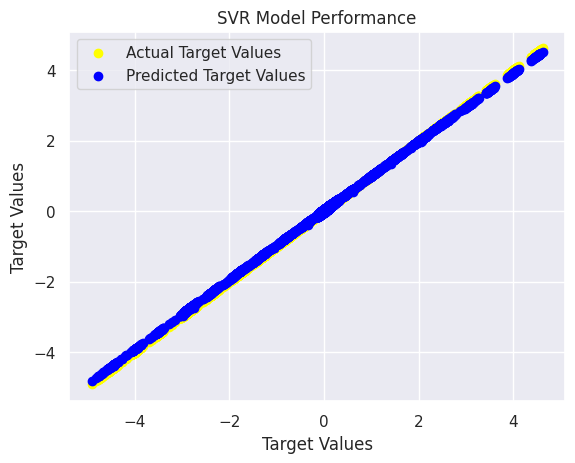

In [864]:
#Plotting the graph for the model

plt.scatter(y_test, y_test, c='yellow', label='Actual Target Values')
plt.scatter(y_test, y_test_pred, c='blue', label='Predicted Target Values')
plt.xlabel("Target Values")
plt.ylabel("Target Values")
plt.title("SVR Model Performance")
plt.legend()
plt.show()